In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

In [2]:
df = pd.read_csv('medical_clean.csv', usecols=['ReAdmis', 'Gender'])

In [3]:
#verify the columns do not contain any missing values
missing_values=df.isnull().sum()
print(missing_values)

Gender     0
ReAdmis    0
dtype: int64


In [4]:
# Contingency Table
contingency_table = pd.crosstab(df['Gender'], df['ReAdmis'])

In [5]:
print("Contingency Table:")
print(contingency_table)

Contingency Table:
ReAdmis      No   Yes
Gender               
Female     3205  1813
Male       2995  1773
Nonbinary   131    83


In [6]:
# Chi-Square Test
chi2, p, expected = chi2_contingency(contingency_table)

In [7]:
print("\nChi-Square Test Results:")
print(f"Chi2 statistic: {chi2}")
print(f"p-value: {p}")
print(f"Expected Frequencies: \n{expected}")


Chi-Square Test Results:
Chi2 statistic: 1.5857714961641314
p-value: 0.4525370014241822
Expected Frequencies: 
[[3176.8958 1841.1042]
 [3018.6208 1749.3792]
 [ 135.4834   78.5166]]


In [8]:
# Determine if there's an association based on the p-value (e.g., alpha = 0.05)
if p < 0.05:
    print("There is a significant association between hospital readmission and gender.")
else:
    print("There is no significant association between hospital readmission and gender.")

There is no significant association between hospital readmission and gender.


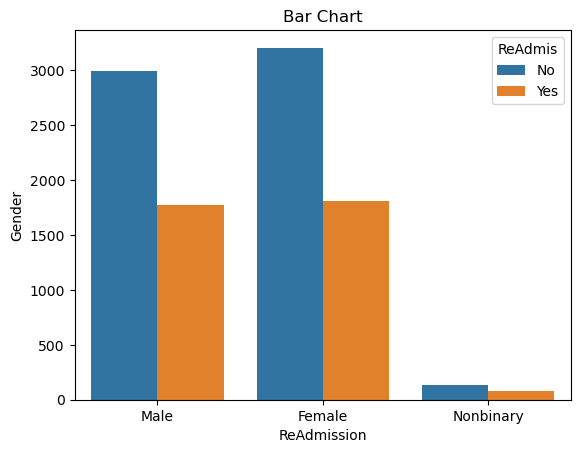

In [9]:
sns.countplot(x='Gender', hue='ReAdmis', data=df)
plt.xlabel('ReAdmission')
plt.ylabel('Gender')
plt.title('Bar Chart')

# Show the plot
plt.show()

In [10]:
#Univariate analysis for two continous variable Vitamin D levels and Initial days
#Categorical variables Complication risk and Anxiety
df_a=pd.read_csv('medical_clean.csv', usecols=['Anxiety','Complication_risk','VitD_levels', 'Initial_days'])


In [11]:
#Observe the data
df_a['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

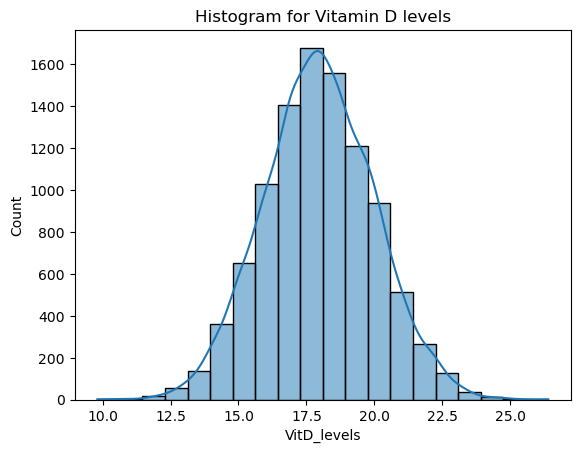

In [12]:
#Histogram for Vitamin D levels
sns.histplot(df_a['VitD_levels'], bins=20, kde=True)
plt.title("Histogram for Vitamin D levels")
plt.show()

In [13]:
#Observe the data
df_a['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

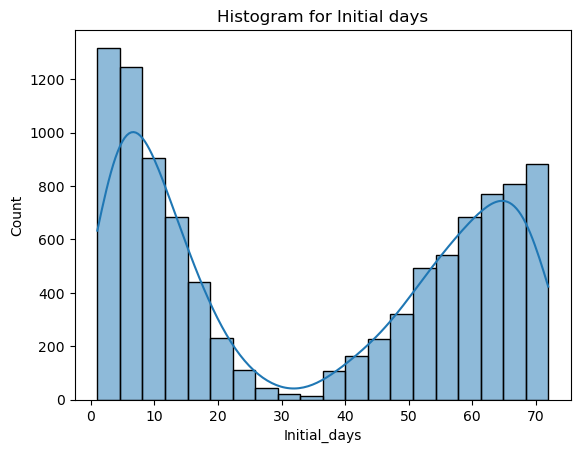

In [14]:
#Histogram for Initial days
sns.histplot(df_a['Initial_days'], bins=20, kde=True)
plt.title("Histogram for Initial days")
plt.show()

In [15]:
#Explore the values of the complication risk column
df_a['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

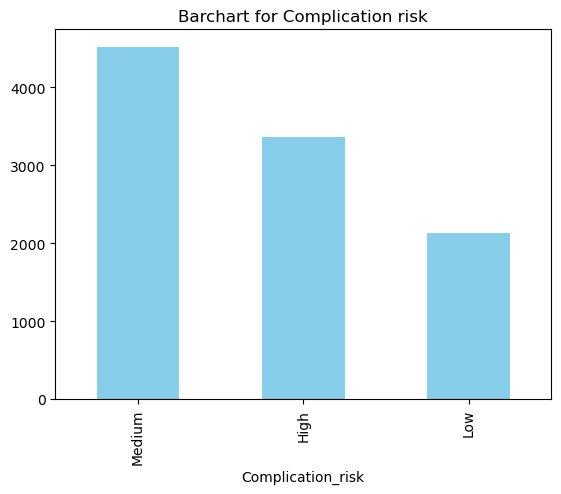

In [16]:
#Barchart for Complication risk
df_a['Complication_risk'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Barchart for Complication risk")
plt.show()

In [17]:
#Explore the values of the Anxiety column
df_a['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

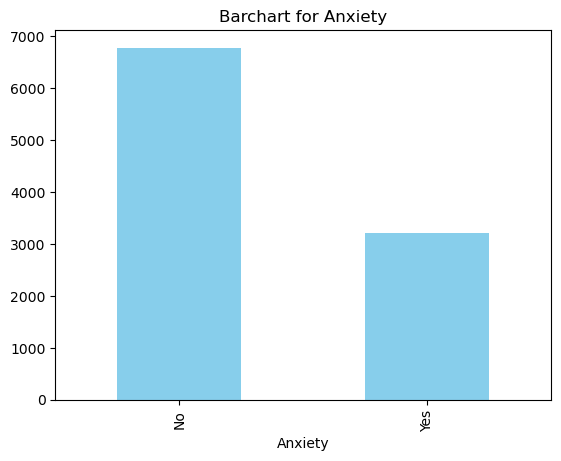

In [18]:
#Barchart for ReAdmission
df_a['Anxiety'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Barchart for Anxiety")
plt.show()

In [19]:
#Bivariate analysis
df_b=pd.read_csv('medical_clean.csv', usecols=['TotalCharge','Initial_admin','Stroke', 'Additional_charges'])

In [20]:
#Observe the data
df_b['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [21]:
df_b['Additional_charges'].describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

In [22]:
df_b['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [23]:
df_b['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

Pearson's Correlation Coefficient: 0.02925582402378013
P-value: 0.0034352435844610014


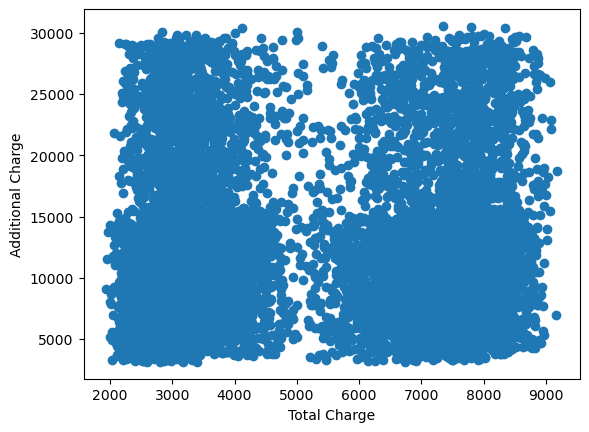

In [24]:
#Bivariate statistics for continuous variable
#Pearson correlation coefficient
corr, p_value = pearsonr(df_b['TotalCharge'], df_b['Additional_charges'])
print(f"Pearson's Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")
# scatter plot with a regression line
plt.scatter(df_b['TotalCharge'], df_b['Additional_charges'])
plt.xlabel('Total Charge')
plt.ylabel('Additional Charge')
plt.show()

In [25]:
#Bivariate statistics for categorical variables
#Cramer's V for the two categorical data
contingency_table_categorical= pd.crosstab(df_b['Initial_admin'], df_b['Stroke'])
chi2, p, dof, expected = chi2_contingency(contingency_table_categorical)
# Calculate Cramér's V
n = contingency_table_categorical.sum().sum()  # Total sample size
k = min(contingency_table_categorical.shape)  # The smaller of number of rows or columns
cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.009742721349146796


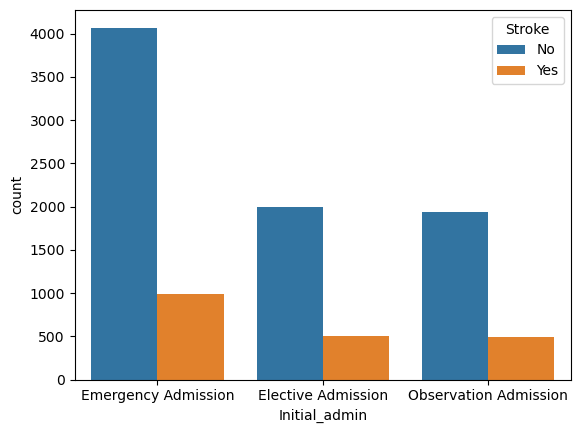

In [26]:
sns.countplot(x='Initial_admin', hue='Stroke', data=df_b)
plt.show()

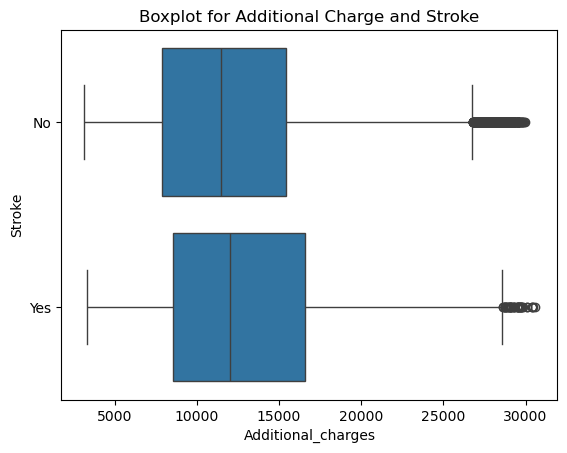

In [27]:
#Bivariate visualization
# Boxplot for Stroke and Additional charges
sns.boxplot(x='Additional_charges', y='Stroke', data=df_b)
plt.title("Boxplot for Additional Charge and Stroke")
plt.show()

Text(0.5, 1.0, 'Violin plot for Total Charge and Initial Admin')

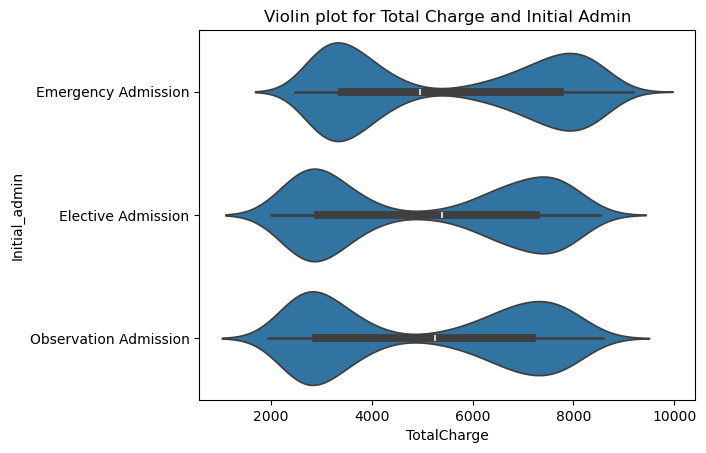

In [28]:
#Violin plot for Total charge and Initial admission
sns.violinplot(data=df_b, x="TotalCharge", y='Initial_admin')
plt.title('Violin plot for Total Charge and Initial Admin')